In [3]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [138]:
import os
current_directory = os.getcwd()
print(current_directory)

#filename = './sampledata/bitcoin_2020-07-24_2025-07-23.csv'
filename = './sampledata/MicrosoftJuly2025.csv'
start = '2024-07-24'
end = '2025-07-23'

stockName = "Microsoft"

D:\nuviot\ai.MachineLearning\examples


In [115]:
# If you export data from bit coin site, we need to reverse.
# make sure you also remove the column headers since we don't want them at the end.
# also the final line needs to have a CR so make sure that's in there.
# probably should make this a bit smarter.
with open(filename) as f:
    headers = f.readline()
    line1 = f.readline()
    line2 = f.readline()

    print(headers)
    print(line1) 
    print(line2)
# TODO If data date on line 1 > line 2, then do the reverse.
    data = f.readlines()

# reverse the data
data.reverse()

# re-write the file
with open(filename, 'w') as f:
    f.writelines(data)

07/22/2025,"510.97","511.20","505.27","505.27","13,868,640"

07/21/2025,"506.71","512.09","505.55","510.06","14,066,810"

07/18/2025,"514.48","514.64","507.43","510.05","21,209,670"



In [117]:
import pandas as pd

df = pd.read_csv(filename);
df.head()

,Date,Open,High,Low,Close,Volume
0,07/22/2024,441.79,444.60,438.91,442.94,"15,808,760"
1,07/23/2024,443.90,448.39,443.10,444.85,"13,107,050"
2,07/24/2024,440.45,441.48,427.59,428.90,"26,805,801"
3,07/25/2024,428.80,429.80,417.51,418.40,"29,943,801"
4,07/26/2024,418.20,428.92,417.27,425.27,"23,583,840"


In [134]:
df.head()
df["Close"]
stock_prices = pd.DataFrame( df["Close"]).rename(columns={"Closing Price (USD)": "Price"})
stock_prices


,Close
0,442.94
1,444.85
2,428.90
3,418.40
4,425.27
...,...
243,503.32
244,503.02
245,505.82
246,505.62


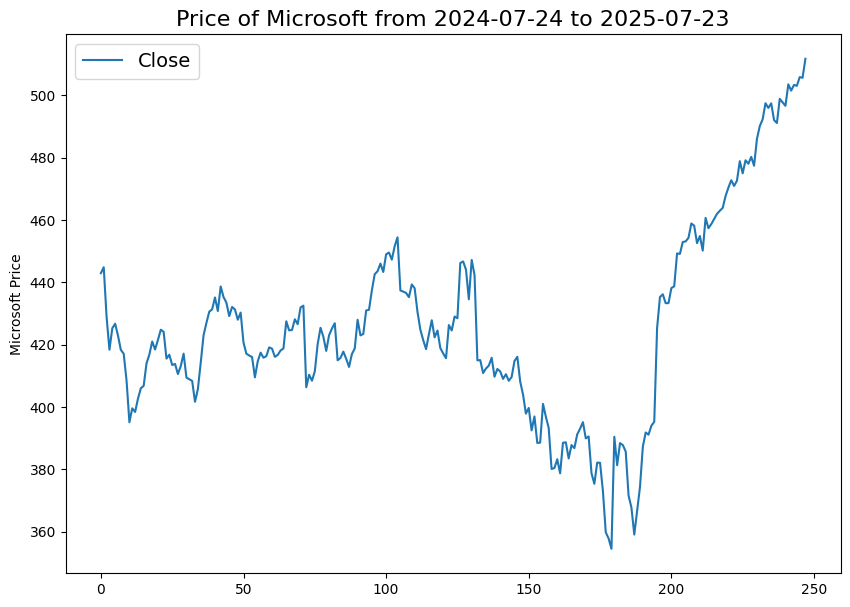

In [139]:
import matplotlib.pyplot as plt
stock_prices.plot(figsize=(10, 7))
plt.ylabel(f"{stockName} Price")
caption = f"Price of {stockName} from {start} to {end}"
plt.title(caption , fontsize=16)
plt.legend(fontsize=14);

In [141]:
import csv
from datetime import datetime

#date formats
mmddyyyy = "%m/%d/%Y"
yyyymmdd = "%Y-%m-%d"
dateformat = mmddyyyy
timesteps = []
close_prices = []
with open(filename, "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], dateformat)) # get the dates as dates (not strings), strptime = string parse time
    close_prices.append(float(line[4])) # get the closing price as float

# View first 10 of each
timesteps[:10], close_prices[:10]

([datetime.datetime(2024, 7, 22, 0, 0),
  datetime.datetime(2024, 7, 23, 0, 0),
  datetime.datetime(2024, 7, 24, 0, 0),
  datetime.datetime(2024, 7, 25, 0, 0),
  datetime.datetime(2024, 7, 26, 0, 0),
  datetime.datetime(2024, 7, 29, 0, 0),
  datetime.datetime(2024, 7, 30, 0, 0),
  datetime.datetime(2024, 7, 31, 0, 0),
  datetime.datetime(2024, 8, 1, 0, 0),
  datetime.datetime(2024, 8, 2, 0, 0)],
 [442.94,
  444.85,
  428.9,
  418.4,
  425.27,
  426.73,
  422.92,
  418.35,
  417.11,
  408.49])

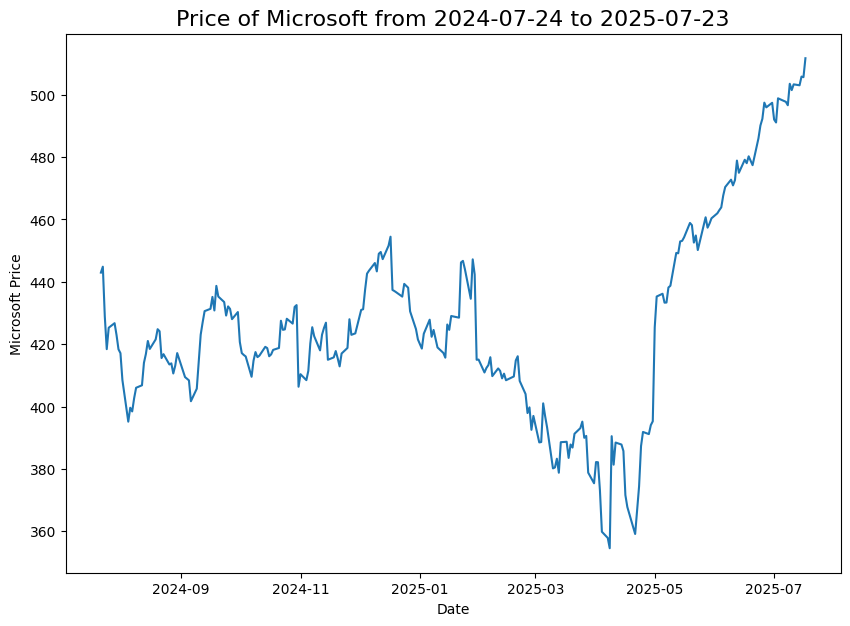

In [143]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, close_prices)
plt.title(f"Price of {stockName} from {start} to {end}", fontsize=16)
plt.xlabel("Date")
plt.ylabel(f"{stockName} Price");

In [147]:
timesteps = stock_prices.index.to_numpy()
close_prices = stock_prices["Close"].to_numpy()

timesteps[:10], close_prices[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([442.94, 444.85, 428.9 , 418.4 , 425.27, 426.73, 422.92, 418.35,
        417.11, 408.49]))

In [155]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(close_prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], close_prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], close_prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(198, 50, 198, 50)

In [156]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

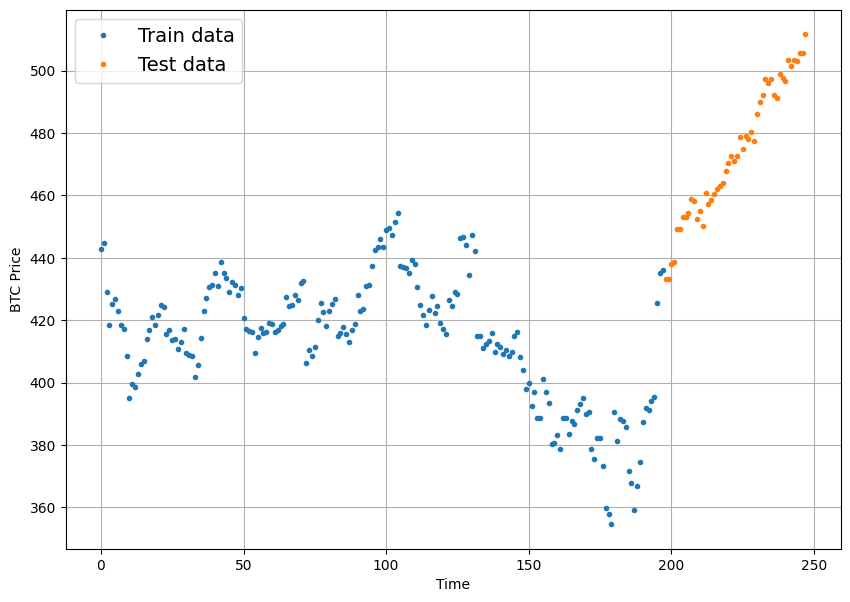

In [157]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [158]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([433.31, 433.35, 438.17, 438.73, 449.26, 449.14, 452.94, 453.13,
        454.27, 458.87]),
 array([491.09, 498.84, 497.72, 496.62, 503.51, 501.48, 503.32, 503.02,
        505.82, 505.62]))

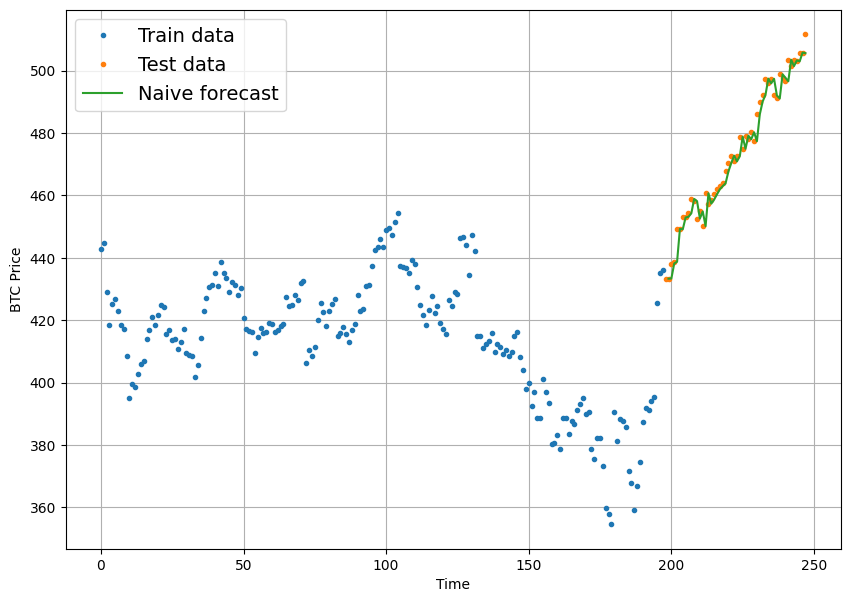

In [159]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast")

In [160]:
import tensorflow as tf



In [161]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [209]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mae(y_true, y_pred)
  mse = tf.keras.metrics.mae(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mape(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"Mean Absolute Error": mae.numpy(),
          "Mean Square Error": mse.numpy(),
          "Root Mean Square Error": rmse.numpy(),
          "Mean Absolute Error %": mape.numpy(),
          "Mean Absolute Scaled Error": mase.numpy()}

In [210]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results


{'Mean Absolute Error': np.float32(3.0973487),
 'Mean Square Error': np.float32(3.0973487),
 'Root Mean Square Error': np.float32(1.7599286),
 'Mean Absolute Error %': np.float32(0.65246385),
 'Mean Absolute Scaled Error': np.float32(0.9798502)}

In [170]:
tf.reduce_mean(y_test).numpy()

np.float64(473.9164)

In [172]:
# Start ML
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [173]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [174]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [176]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [179]:
full_windows, full_labels = make_windows(close_prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(241, 241)

In [182]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [442.94 444.85 428.9  418.4  425.27 426.73 422.92] -> Label: [418.35]
Window: [444.85 428.9  418.4  425.27 426.73 422.92 418.35] -> Label: [417.11]
Window: [428.9  418.4  425.27 426.73 422.92 418.35 417.11] -> Label: [408.49]
Window: [498.84 497.72 496.62 503.51 501.48 503.32 503.02] -> Label: [505.82]
Window: [497.72 496.62 503.51 501.48 503.32 503.02 505.82] -> Label: [505.62]
Window: [496.62 503.51 501.48 503.32 503.02 505.82 505.62] -> Label: [511.7]


In [183]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [184]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(192, 49, 192, 49)

In [185]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [194]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name + '.keras'), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [195]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 464.8947 - mae: 464.8947 - val_loss: 481.6790 - val_mae: 481.6790
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 412.6891 - mae: 412.6891 - val_loss: 422.5536 - val_mae: 422.5536
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 360.2805 - mae: 360.2805 - val_loss: 362.7023 - val_mae: 362.7023
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 307.4116 - mae: 307.4116 - val_loss: 302.6081 - val_mae: 302.6081
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 254.3418 - mae: 254.3418 - val_loss: 242.3173 - val_mae: 242.3173
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 201.1249 - mae: 201.1249 - val_loss: 182.2685 - val_mae: 182.2685
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 148.2943 - mae: 148.2943 - val_loss: 123.9224 - val_mae: 123.9224
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 96.8496 - mae: 96.8496 - val_loss: 66.2713 - val_mae: 66.2713
Epoch 9/100

In [196]:
model_1.evaluate(test_windows, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.1581 - mae: 8.1581


[8.047709465026855, 8.047709465026855]

In [198]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense.keras")
model_1.evaluate(test_windows, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.3212 - mae: 4.3212


[4.28031063079834, 4.28031063079834]

In [201]:

def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [227]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

InvalidArgumentError: Graph execution error:

Detected at node model_1_dense_1/dense_10_1/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\tornado\platform\asyncio.py", line 211, in start

  File "C:\Python312\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\Python312\Lib\asyncio\base_events.py", line 1986, in _run_once

  File "C:\Python312\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 397, in dispatch_shell

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 368, in execute_request

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 752, in execute_request

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 455, in do_execute

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\ipykernel\zmqshell.py", line 577, in run_cell

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3116, in run_cell

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3171, in _run_cell

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3394, in run_cell_async

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3639, in run_ast_nodes

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3699, in run_code

  File "C:\Users\kevin\AppData\Local\Temp\ipykernel_9848\4116168925.py", line 2, in <module>

  File "C:\Users\kevin\AppData\Local\Temp\ipykernel_9848\3042064211.py", line 12, in make_preds

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 566, in predict

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 260, in one_step_on_data_distributed

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 250, in one_step_on_data

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 105, in predict_step

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py", line 936, in __call__

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\ops\operation.py", line 58, in __call__

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\models\sequential.py", line 220, in call

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py", line 183, in call

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\ops\function.py", line 177, in _run_through_graph

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py", line 648, in call

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py", line 936, in __call__

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\ops\operation.py", line 58, in __call__

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py", line 155, in call

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\activations\activations.py", line 47, in relu

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\activations\activations.py", line 101, in static_call

  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\nn.py", line 15, in relu

Matrix size-incompatible: In[0]: [32,30], In[1]: [7,128]
	 [[{{node model_1_dense_1/dense_10_1/Relu}}]] [Op:__inference_one_step_on_data_distributed_14364]

In [228]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
print('Naive Results')
print(naive_results)

print('Model Predicted Results')
print(model_1_results)



InvalidArgumentError: {{function_node __wrapped__Sub_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [44] vs. [49] [Op:Sub] name: 

ValueError: x and y must have same first dimension, but have shapes (44,) and (49,)

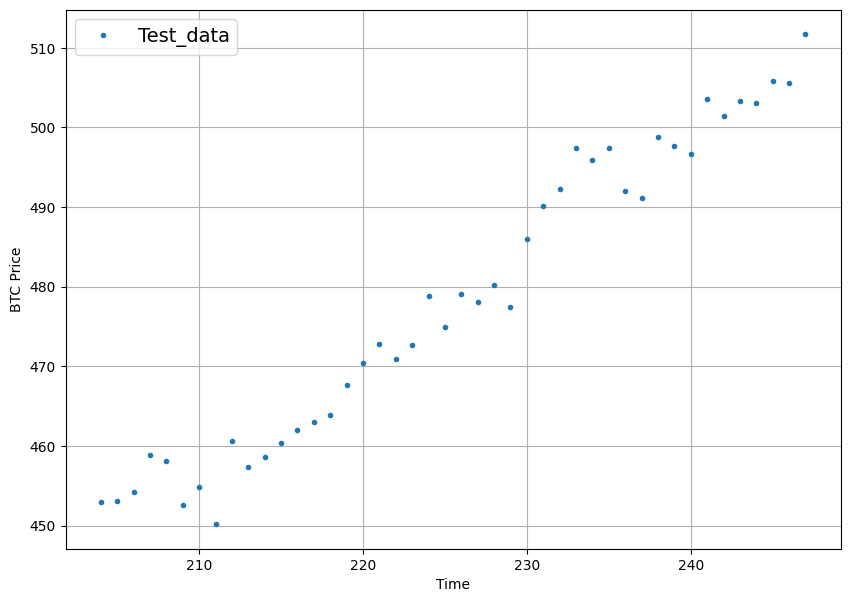

In [229]:
offset = 0
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

In [215]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(close_prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(218, 218)

In [216]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(174, 44, 174, 44)

In [217]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [218]:
model_2.evaluate(test_windows, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 25.3557


24.670618057250977

In [219]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [221]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
print('Naive Results')
print(naive_results)

print('Model 1 Predicted Results')
print(model_1_results)

print('Model 2 Predicted Results')
print(model_2_results)


Naive Results
{'Mean Absolute Error': np.float32(3.0973487), 'Mean Square Error': np.float32(3.0973487), 'Root Mean Square Error': np.float32(1.7599286), 'Mean Absolute Error %': np.float32(0.65246385), 'Mean Absolute Scaled Error': np.float32(0.9798502)}
Model 1 Predicted Results
{'Mean Absolute Error': np.float32(4.2803106), 'Mean Square Error': np.float32(4.2803106), 'Root Mean Square Error': np.float32(2.068891), 'Mean Absolute Error %': np.float32(0.9178193), 'Mean Absolute Scaled Error': np.float32(1.3540816)}
Model 2 Predicted Results
{'Mean Absolute Error': np.float32(24.670618), 'Mean Square Error': np.float32(24.670618), 'Root Mean Square Error': np.float32(4.966953), 'Mean Absolute Error %': np.float32(5.2043915), 'Mean Absolute Scaled Error': np.float32(8.042728)}


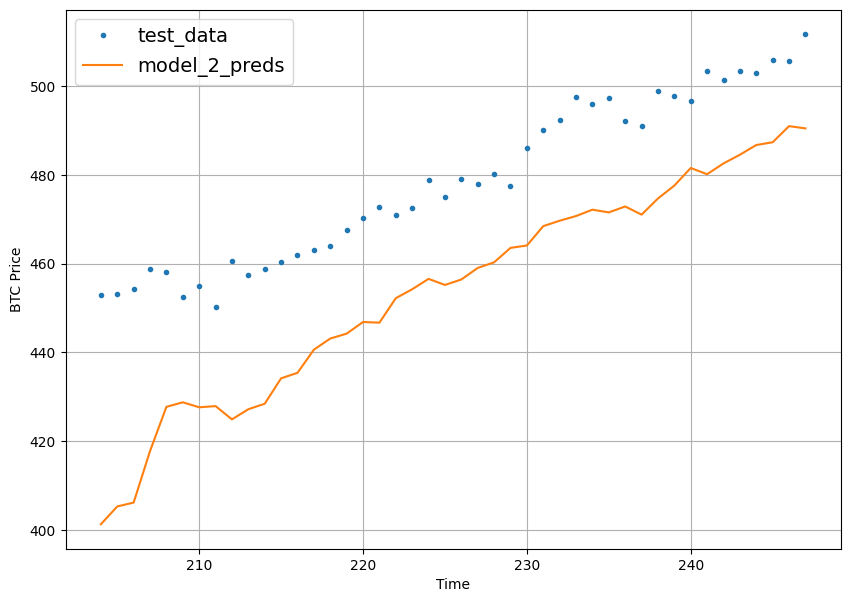

In [230]:
offset = 0
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")


In [231]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(close_prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(212, 212)

In [232]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [233]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 26.9866


26.142292022705078